# Notebook 7 - Comparing the GOES Cloud Mask to our Cloud Mask

The GOES internal cloud mask incorrectly identifies cold ocean as clouds and therefore overestimates cloud frequency in the Puget Sound. Here, we compare the difference between this mask and the new one we derived from training a model on multi-spectral retrievals against timelapse cameras on San Juan Island and TSI data from the East River in Colorado

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
month = '06'

path = '/storage/cdalden/goes/washington/goes17/cloud_counts/'
goes_mask_ds = xr.open_dataset(path + 'internal_goes_cloud_frequency_2022-{}.nc'.format(month))
goes_mask_da = goes_mask_ds.cloud_frequency

rgb_mask_ds = xr.open_dataset(path + 'goes17_monthly_cloud_frequency_washington_2022{}.nc'.format(month))
rgb_mask_da = rgb_mask_ds.monthly_frequency


(46.0, 49.0)

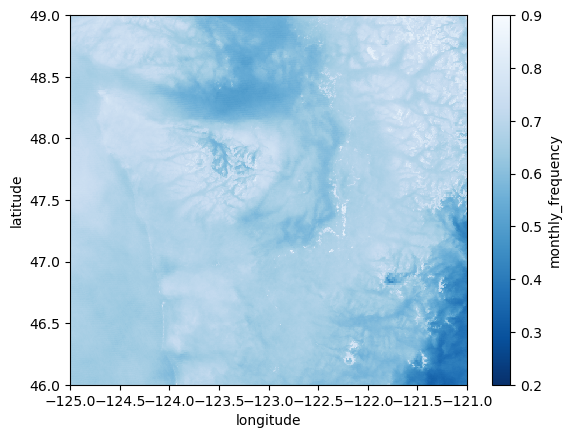

In [3]:
fig, ax = plt.subplots()
rgb_mask_da.plot(ax=ax, vmin=0.2, vmax=0.9, cmap='Blues_r')

ax.set_xlim(-125,-121)
ax.set_ylim(46,49)

In [4]:
# Regrid the coarser GOES data to match the finer RGB grid
goes_mask_on_rgb_grid = goes_mask_da.interp(
    latitude=rgb_mask_da.latitude,
    longitude=rgb_mask_da.longitude,
    method='nearest')
diff_da = rgb_mask_da - goes_mask_on_rgb_grid


In [5]:
def map_plot_features(ax):
    # Add state outlines and coastlines
    ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black')
    ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor="black")
    ax.add_feature(cfeature.RIVERS)
    # Add gridlines with latitude and longitude labels
    gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
    gridlines.top_labels = False  # Disable top labels
    gridlines.right_labels = False  # Disable right labels
    gridlines.xlabel_style = {'size': 10, 'color': 'black'}
    gridlines.ylabel_style = {'size': 10, 'color': 'black'}
    
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    ax.set_extent([-125, -122, 46, 49], crs=ccrs.PlateCarree()) # Western Washington
    

Text(0.5, 1.0, 'Cloud Frequency for June 2022\nRGB trained thresholds minus GOES Internal\nblue = GOES internal too cloudy')

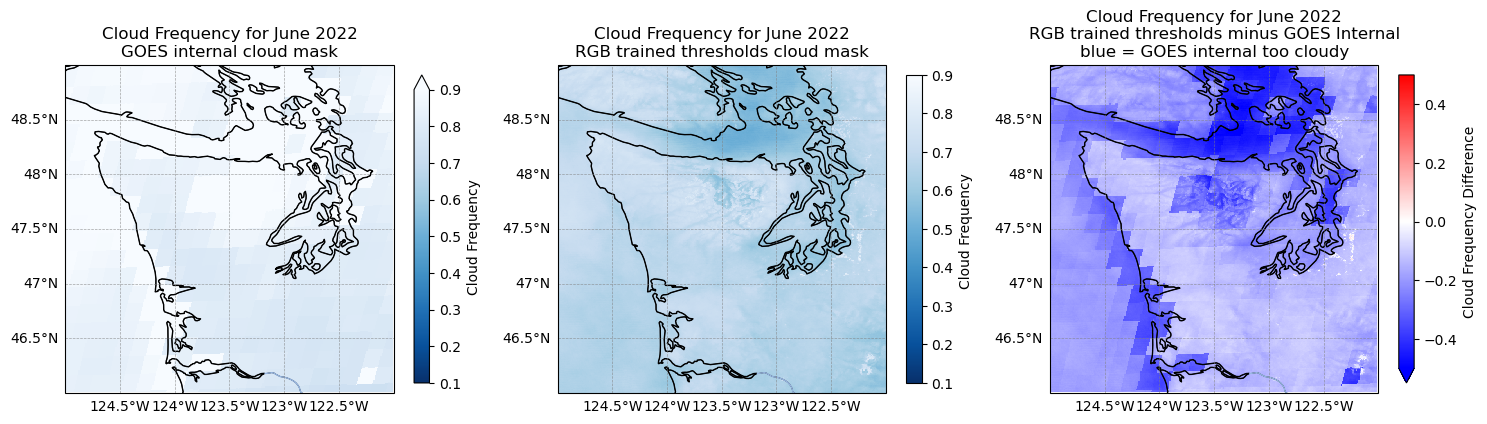

In [6]:
# Create the plot with Cartopy projection
fig, ax = plt.subplots(1,3, figsize=(18,8), subplot_kw={'projection': ccrs.PlateCarree()})

goes_mask_da.plot(
    ax=ax[0], 
    cmap="Blues_r",  
    transform=ccrs.PlateCarree(),  # Specify the data's coordinate system
    cbar_kwargs={'label': 'Cloud Frequency', 'shrink': 0.5},
    vmin=0.1, vmax=0.9)
map_plot_features(ax[0])
ax[0].set_title(f"Cloud Frequency for June 2022\nGOES internal cloud mask")

rgb_mask_da.plot(
    ax=ax[1], 
    cmap="Blues_r",  
    transform=ccrs.PlateCarree(),  # Specify the data's coordinate system
    cbar_kwargs={'label': 'Cloud Frequency ', 'shrink': 0.5},
    vmin=0.1, vmax=0.9)
map_plot_features(ax[1])
ax[1].set_title(f"Cloud Frequency for June 2022\nRGB trained thresholds cloud mask")

diff_da.plot(
    ax=ax[2], 
    cmap="bwr",  
    transform=ccrs.PlateCarree(),  # Specify the data's coordinate system
    cbar_kwargs={'label': 'Cloud Frequency Difference', 'shrink': 0.5},
    vmin=-0.5, vmax=0.5)
map_plot_features(ax[2])
ax[2].set_title(f"Cloud Frequency for June 2022\nRGB trained thresholds minus GOES Internal\nblue = GOES internal too cloudy")